# IST 736 : Text Mining : Airline Tweets

In [88]:
# Imports

# Data frame 
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Text Analysis
from sklearn.model_selection import train_test_split

# Vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import sklearn
from sklearn.svm import LinearSVC

# Confusion Matrices
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

# Classification reports
from sklearn.metrics import classification_report
from yellowbrick.classifier import classification_report

/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [30]:
# Import csv data
raw_data = pd.read_csv('https://raw.githubusercontent.com/tmcamero/MSADS_Portfolio/main/IST%20736%3A%20Text%20Mining%3A%20Airline%20Tweet%20Analysis/Data/Tweets.csv?token=ARVQJIE5HCNP6TG2BCK3FJTAJZVSG')

# Explore Data

In [31]:
# Explore data types
raw_data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [32]:
# Print first 5 rows
raw_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [33]:
# Number of rows and columns
raw_data.shape

(14640, 15)

In [34]:
# Create x and y variables to train models
# y will be sentiment or label
# x will be text of tweets
y = raw_data['airline_sentiment']
x = raw_data['text']

# Visualizations

In [35]:
# Check data for sentiment distribution
unique, counts = np.unique(raw_data.airline_sentiment, return_counts=True)
print(np.asarray((unique, counts)))

[['negative' 'neutral' 'positive']
 [9178 3099 2363]]


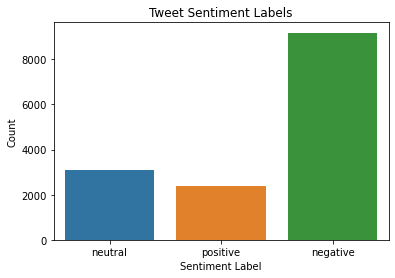

In [36]:
# Create sentiment count plot
sns.countplot(x = 'airline_sentiment', data = raw_data)
plt.ylabel('Count')
plt.xlabel('Sentiment Label')
plt.title('Tweet Sentiment Labels')
plt.show()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


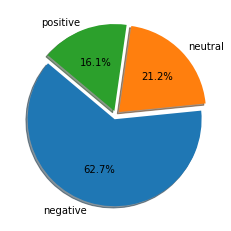

In [87]:
# Plot of sentiment distribution

yclass = y.value_counts()
print(yclass)
labels = yclass.index.values.tolist()
values = yclass.values.tolist()
explode = (0.05, 0.05, 0.05)

plt.pie(values, explode = explode, labels = labels,
        autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.show()

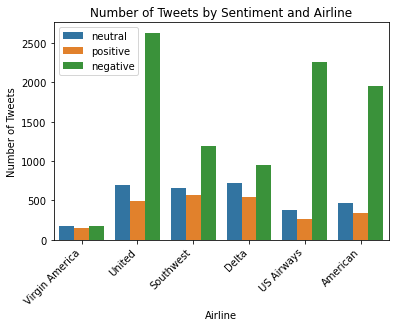

In [37]:
# Create sentiment count by airline
sns.countplot(x = 'airline', hue = 'airline_sentiment', data = raw_data)
plt.ylabel('Number of Tweets')
plt.xlabel('Airline')
plt.title('Number of Tweets by Sentiment and Airline')
plt.legend(loc = 'upper left')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [38]:
# Create column of tweet length
raw_data['tweet_length'] = raw_data['text'].astype(str).apply(len)
raw_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,tweet_length
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),35
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),72
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),71
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),126
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),55


In [39]:
# Create dataframe of tweet length by sentiment
neg_len = raw_data[raw_data.airline_sentiment == 'negative']
pos_len = raw_data[raw_data.airline_sentiment == 'positive']
neu_len = raw_data[raw_data.airline_sentiment == 'neutral']

tweet_length    113.947919
dtype: float64

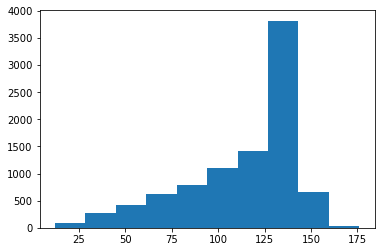

In [40]:
# Histogram of tweet length by sentiment
plt.hist(neg_len['tweet_length'])
neg_len[['tweet_length']].mean()

tweet_length    86.082945
dtype: float64

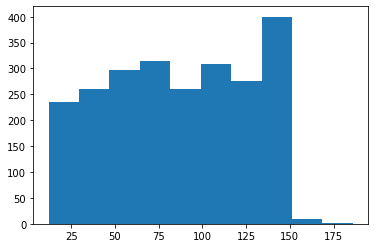

In [41]:
plt.hist(pos_len['tweet_length'])
pos_len[['tweet_length']].mean()

tweet_length    87.359471
dtype: float64

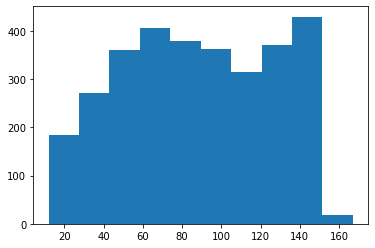

In [42]:
plt.hist(neu_len['tweet_length'])
neu_len[['tweet_length']].mean()

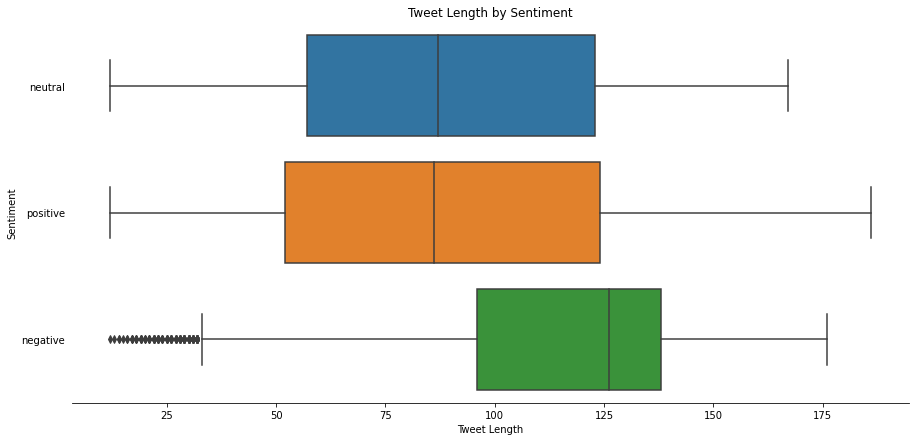

In [43]:
# Create box plot of tweet length

# Set figure size
fig, ax = plt.subplots(figsize = (15 , 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

sns.boxplot(y = 'airline_sentiment', x = 'tweet_length', data = raw_data)
ax.set_title('Tweet Length by Sentiment')
ax.set_ylabel('Sentiment')
ax.set_xlabel('Tweet Length')
plt.show()

In [44]:
# Create data frame of negative reasons count
neg_data = pd.pivot_table(raw_data, index = ['negativereason', 'airline'], values = ['tweet_id'],
                         aggfunc = 'count').sort_values(by = 'tweet_id', ascending = False)
# Reset index to make reason column
neg_data = neg_data.reset_index()

In [45]:
neg_data

,negativereason,airline,tweet_id
0,Customer Service Issue,US Airways,811
1,Customer Service Issue,American,768
2,Customer Service Issue,United,681
3,Late Flight,United,525
4,Late Flight,US Airways,453
5,Customer Service Issue,Southwest,391
6,Can't Tell,United,379
7,Late Flight,Delta,269
8,Lost Luggage,United,269
9,Late Flight,American,249


In [46]:
# Replace 'longlines' with Long Lines
neg_data['negativereason'] = neg_data['negativereason'].replace('longlines', 'Long Lines') 

In [47]:
neg_data

,negativereason,airline,tweet_id
0,Customer Service Issue,US Airways,811
1,Customer Service Issue,American,768
2,Customer Service Issue,United,681
3,Late Flight,United,525
4,Late Flight,US Airways,453
5,Customer Service Issue,Southwest,391
6,Can't Tell,United,379
7,Late Flight,Delta,269
8,Lost Luggage,United,269
9,Late Flight,American,249


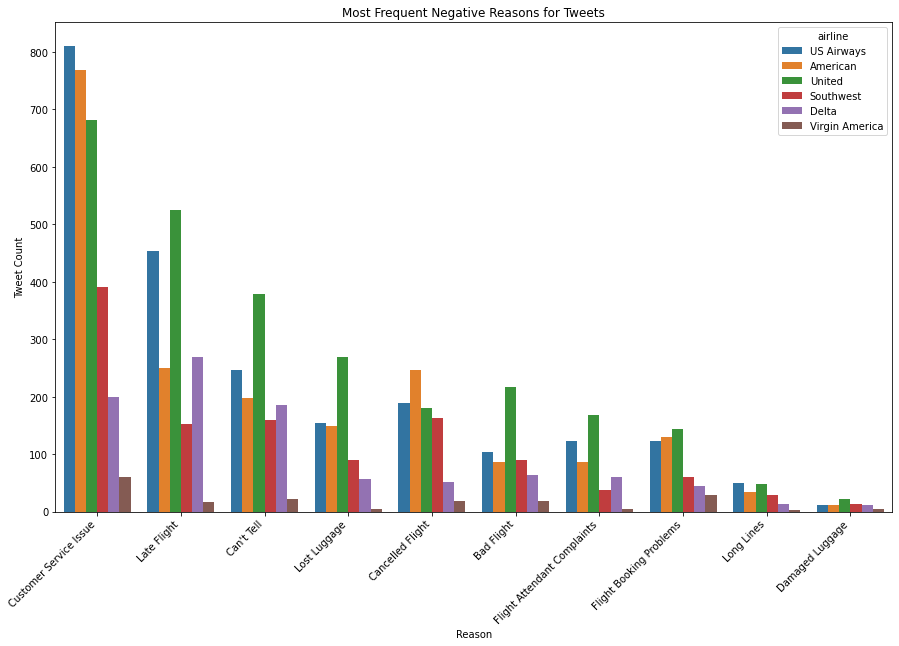

In [48]:
# Create bar graph of negative reasons
plt.figure(figsize = (15, 9))
sns.barplot(x = 'negativereason', y = 'tweet_id', hue = 'airline', data = neg_data)
plt.ylabel('Tweet Count')
plt.title('Most Frequent Negative Reasons for Tweets')
plt.xlabel('Reason')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

# Text Analysis

In [57]:
# Seperate data into labels and text
y = raw_data['airline_sentiment']
X = raw_data['text']
# Inspect data
print(y[0])
print(X[0])

neutral
@VirginAmerica What @dhepburn said.


In [58]:
# Split train/test data for hold-out test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [62]:
# Inspect data
X_test
y_test

13983    negative
14484    negative
6403     negative
9653     negative
13268    negative
           ...   
5429     negative
8113      neutral
4512     negative
6759     positive
7119     negative
Name: airline_sentiment, Length: 5856, dtype: object

In [63]:
# Inspect data
print(X_train[0])
print(y_train[0])
print(X_test[13983])
print(y_test[13983])

@VirginAmerica What @dhepburn said.
neutral
@AmericanAir In car gng to DFW. Pulled over 1hr ago - very icy roads. On-hold with AA since 1hr. Can't reach arpt for AA2450. Wat 2 do?
negative


In [64]:
# Check the training examples for each sentiment
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)))

[['negative' 'neutral' 'positive']
 [5499 1847 1438]]


In [66]:
# CountVectorizer

# MNB
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df = 5, stop_words='english')

# Bernoulli
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df = 5, stop_words='english')

# tfidf
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df = 5, stop_words='english')

In [67]:
# Fit vocabulary in training documents and transform the training documents into vectors

# MNB
X_train_vec = unigram_count_vectorizer.fit_transform(X_train)

# Bernoulli
X_train_vecB = unigram_bool_vectorizer.fit_transform(X_train)

# tfifd
X_train_vect = unigram_tfidf_vectorizer.fit_transform(X_train)

In [68]:
# Vectorize the test data

# MNB
X_test_vec = unigram_count_vectorizer.transform(X_test)

# Bernoulli
X_test_vecB = unigram_bool_vectorizer.transform(X_test)

# tfidf
X_test_vect = unigram_tfidf_vectorizer.transform(X_test)

## Naive Bayes

In [70]:
# Train classifiers

nb_clf = MultinomialNB()
b_clf = BernoulliNB()

In [71]:
# Use the training data to train the models

# MNB
nb_clf.fit(X_train_vec,y_train)

# Bernoulli
b_clf.fit(X_train_vecB, y_train)

# tfidf
nb_clf.fit(X_train_vect, y_train)

MultinomialNB()

In [72]:
# Test the classifier on the test data set, print accuracy score
print('Multinomial Naive Bayes Accuracy Score is: ',nb_clf.score(X_test_vec,y_test))
print('Bernoulli Naive Bayes Accuracy Score is: ',b_clf.score(X_test_vecB,y_test))
print('Multinomial TFIDF Naive Bayes Accuracy Score is: ',nb_clf.score(X_test_vect,y_test))

Multinomial Naive Bayes Accuracy Score is:  0.7638319672131147
Bernoulli Naive Bayes Accuracy Score is:  0.7682718579234973
Multinomial TFIDF Naive Bayes Accuracy Score is:  0.7404371584699454


In [74]:
# Confusion Matrices

# MNB
y_predMNB = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
cmMNB = confusion_matrix(y_test,y_predMNB, labels = ['positive', 'neutral', 'negative'])
print('The Multinomial Naive Bayes Confusion Matrix is:\n ', cmMNB)

# Bernoulli
y_predB = b_clf.fit(X_train_vecB, y_train).predict(X_test_vecB)
cmB = confusion_matrix(y_test,y_predB, labels = ['positive', 'neutral', 'negative'])
print('The Bernoulli Naive Bayes Confusion Matrix is: \n ', cmB)

# tfidf
y_predT = nb_clf.fit(X_train_vect, y_train).predict(X_test_vect)
cmT = confusion_matrix(y_test,y_predT, labels = ['positive', 'neutral', 'negative'])
print('The Multinomial Naive Bayes TFIDF Confusion Matrix is:\n ', cmT)

The Multinomial Naive Bayes Confusion Matrix is:
  [[ 611  105  209]
 [ 128  631  493]
 [ 133  331 3215]]
The Bernoulli Naive Bayes Confusion Matrix is: 
  [[ 627  145  153]
 [ 130  737  385]
 [ 141  403 3135]]
The Multinomial Naive Bayes TFIDF Confusion Matrix is:
  [[ 392   68  465]
 [  55  367  830]
 [  23   79 3577]]


In [76]:
# Classification Reports

# MNB
target_names = ['positive', 'neutral', 'negative']
print('The Multinomial Naive Bayes Classification Report is: \n', classification_report(y_test, y_predMNB, target_names = target_names))

# Bernoulli
print('The Bernoulli Naive Bayes Classification Report is: \n', classification_report(y_test, y_predB, target_names = target_names))

# tfidf
print('The Multinomial Naive Bayes TFIDF Classification Report is: \n', classification_report(y_test, y_predT, target_names = target_names))

The Multinomial Naive Bayes Classification Report is: 
               precision    recall  f1-score   support

    positive       0.82      0.87      0.85      3679
     neutral       0.59      0.50      0.54      1252
    negative       0.70      0.66      0.68       925

    accuracy                           0.76      5856
   macro avg       0.70      0.68      0.69      5856
weighted avg       0.75      0.76      0.76      5856

The Bernoulli Naive Bayes Classification Report is: 
               precision    recall  f1-score   support

    positive       0.85      0.85      0.85      3679
     neutral       0.57      0.59      0.58      1252
    negative       0.70      0.68      0.69       925

    accuracy                           0.77      5856
   macro avg       0.71      0.71      0.71      5856
weighted avg       0.77      0.77      0.77      5856

The Multinomial Naive Bayes TFIDF Classification Report is: 
               precision    recall  f1-score   support

    positiv

## Support Vectors

In [81]:
# Initialize the LinearSVC model

# linear C=1
svm_clf = LinearSVC(C=1)
# linear C=10
svm_clf10 = LinearSVC(C=10)
# rbf C=1
svm_clfR1 = sklearn.svm.SVC(C=1, kernel = 'rbf', verbose = True, gamma = 'auto')
# rbf C=10
svm_clfR10 = sklearn.svm.SVC(C=10, kernel = 'rbf', verbose = True, gamma = 'auto')
# poly C=1
svm_clfP1 = sklearn.svm.SVC(C=1, kernel = 'poly', degree = 2, gamma = 'auto')
# poly C=10
svm_clfP10 = sklearn.svm.SVC(C=10, kernel = 'poly', degree = 2, gamma = 'auto')

In [82]:
# Use training data to train model

# linear C=1
svm_clf.fit(X_train_vec, y_train)
# Linear TFIDF C=1
svm_clf.fit(X_train_vect, y_train)
# linear C=10
svm_clf10.fit(X_train_vec, y_train)
# linear TFIDF C=10
svm_clf10.fit(X_train_vect, y_train)
# rbf C=1
svm_clfR1.fit(X_train_vec, y_train)
# rbf TFIDF C=1
svm_clfR1.fit(X_train_vect, y_train)
# rbf C=10
svm_clfR10.fit(X_train_vec, y_train)
# rbf TFIDF C=10
svm_clfR10.fit(X_train_vect, y_train)
# poly C=1
svm_clfP1.fit(X_train_vec, y_train)
# poly TFIDF C=1
svm_clfP1.fit(X_train_vect, y_train)
# poly C=10
svm_clfP10.fit(X_train_vec, y_train)
# poly TFIDF C=10
svm_clfP10.fit(X_train_vect, y_train)

/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibSVM][LibSVM][LibSVM][LibSVM]

SVC(C=10, degree=2, gamma='auto', kernel='poly')

In [83]:
# Use testing data to test model

# linear C=1
print('Support Vector Accuracy Score with C=1 is: ',svm_clf.score(X_test_vec, y_test))
# linear C=1 TFIDF
print('Support Vector Accuracy Score with C=1 TFIDF: ', svm_clf.score(X_test_vect, y_test))
# linear C=10
print('Support Vector Accuracy Score with C=10 is: ',svm_clf10.score(X_test_vec, y_test))
# linear TFIDF C=10
print('Support Vector Accuracy Score with C=10 TFIDF is: ', svm_clf10.score(X_test_vect, y_test))
# rbf C=1
print('Support Vector Accuracy Score with C=1 RBF is: ', svm_clfR1.score(X_test_vec, y_test))
# rbf C=1 TFIDF
print('Support Vector Accuracy Score with C=1 RBF TFIDF is: ', svm_clfR1.score(X_test_vect, y_test))
# rbf C=10
print('Support Vector Accuracy Score with C=10 RBF is: ',svm_clfR10.score(X_test_vec, y_test))
# rbf C=10 TFIDF
print('Support Vector Accuracy Score with C=10 RBF TFIDF is: ',svm_clfR10.score(X_test_vect, y_test))
# poly C=1
print('Support Vector Accuracy Score with C=1 Poly is: ', svm_clfP1.score(X_test_vec, y_test))
# poly C=1 TFIDF
print('Support Vector Accuracy Score with C=1 Poly TFIDF is: ', svm_clfP1.score(X_test_vect, y_test))
# poly C=10
print('Support Vector Accuracy Score with C=10 Poly is: ', svm_clfP10.score(X_test_vec, y_test))
# poly C=10 TFIDF
print('Support Vector Accuracy Score with C=10 Poly TFIDF is: ', svm_clfP10.score(X_test_vect, y_test))

Support Vector Accuracy Score with C=1 is:  0.7474385245901639
Support Vector Accuracy Score with C=1 TFIDF:  0.7703210382513661
Support Vector Accuracy Score with C=10 is:  0.7317281420765027
Support Vector Accuracy Score with C=10 TFIDF is:  0.7402663934426229
Support Vector Accuracy Score with C=1 RBF is:  0.6282445355191257
Support Vector Accuracy Score with C=1 RBF TFIDF is:  0.6282445355191257
Support Vector Accuracy Score with C=10 RBF is:  0.6644467213114754
Support Vector Accuracy Score with C=10 RBF TFIDF is:  0.6282445355191257
Support Vector Accuracy Score with C=1 Poly is:  0.6282445355191257
Support Vector Accuracy Score with C=1 Poly TFIDF is:  0.6282445355191257
Support Vector Accuracy Score with C=10 Poly is:  0.6282445355191257
Support Vector Accuracy Score with C=10 Poly TFIDF is:  0.6282445355191257


In [84]:
# Confusion Matrices

# linear C=1
y_predSV = svm_clf.predict(X_test_vec)
cmSV = confusion_matrix(y_test, y_predSV, labels=['positive','neutral', 'negative'])
print('The Support Vector with C=1 Confusion Matrix is: \n', cmSV)
# linear C=1 TFIDF
y_predSVT = svm_clf.predict(X_test_vect)
cmSVT = confusion_matrix(y_test, y_predSVT, labels=['positive','neutral', 'negative'])
print('The Support Vector with C=1 TFIDF Confusion Matrix is: \n', cmSVT)
# rbf C=1
y_predSVR = svm_clfR1.predict(X_test_vec)
cmSVR = confusion_matrix(y_test, y_predSVR, labels=['positive','neutral', 'negative'])
print('The Support Vector with C=1 RBF Confusion Matrix is: \n', cmSVR)
# rbf C=10
y_predSVR10 = svm_clfR10.predict(X_test_vec)
cmSVR10 = confusion_matrix(y_test, y_predSVR10, labels=['positive','neutral', 'negative'])
print('The Support Vector with C=10 RBF Confusion Matrix is: \n', cmSVR10)
# Poly C=1
y_predSVP = svm_clfP1.predict(X_test_vec)
cmSVP = confusion_matrix(y_test, y_predSVP, labels = ['positive', 'neutral', 'negative'])
print('The Support Vector with C=1 Poly Confusion Matrix is: \n', cmSVP)

The Support Vector with C=1 Confusion Matrix is: 
 [[ 733   93   99]
 [ 222  684  346]
 [ 324  395 2960]]
The Support Vector with C=1 TFIDF Confusion Matrix is: 
 [[ 576  134  215]
 [ 116  658  478]
 [  79  323 3277]]
The Support Vector with C=1 RBF Confusion Matrix is: 
 [[   0    0  925]
 [   0    0 1252]
 [   0    0 3679]]
The Support Vector with C=10 RBF Confusion Matrix is: 
 [[ 234    1  690]
 [  28    2 1222]
 [  24    0 3655]]
The Support Vector with C=1 Poly Confusion Matrix is: 
 [[   0    0  925]
 [   0    0 1252]
 [   0    0 3679]]


In [85]:
# Classification Reports

# linear C=1
print('The Support Vector C=1 Classification Report is: \n', classification_report(y_test, y_predSV, target_names = target_names))
# linear C=1 TFIDF
print('The Support Vector C=1 TFIDF Classification Report is: \n', classification_report(y_test, y_predSVT, target_names = target_names))
# rbf C=10
print('The Support Vector C=10 RBF Classification Report is: \n', classification_report(y_test, y_predSVR10, target_names = target_names))
# poly C=1
print('The Support Vector C=1 Poly Classification Report is: \n', classification_report(y_test, y_predSVP, target_names = target_names))

The Support Vector C=1 Classification Report is: 
               precision    recall  f1-score   support

    positive       0.87      0.80      0.84      3679
     neutral       0.58      0.55      0.56      1252
    negative       0.57      0.79      0.67       925

    accuracy                           0.75      5856
   macro avg       0.68      0.71      0.69      5856
weighted avg       0.76      0.75      0.75      5856

The Support Vector C=1 TFIDF Classification Report is: 
               precision    recall  f1-score   support

    positive       0.83      0.89      0.86      3679
     neutral       0.59      0.53      0.56      1252
    negative       0.75      0.62      0.68       925

    accuracy                           0.77      5856
   macro avg       0.72      0.68      0.70      5856
weighted avg       0.76      0.77      0.76      5856

The Support Vector C=10 RBF Classification Report is: 
               precision    recall  f1-score   support

    positive       

/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


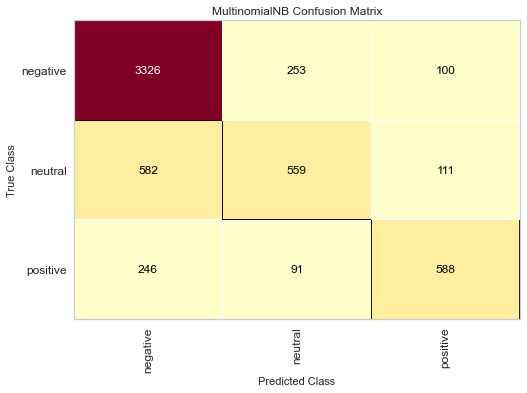

/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


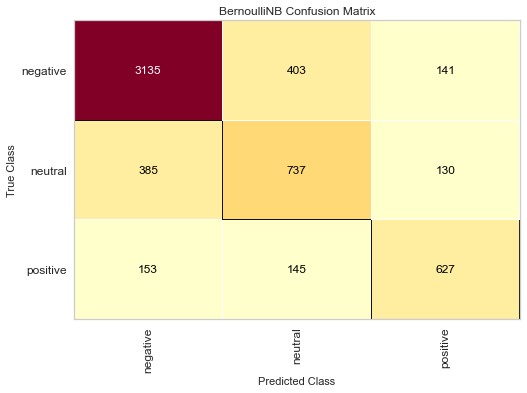

/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


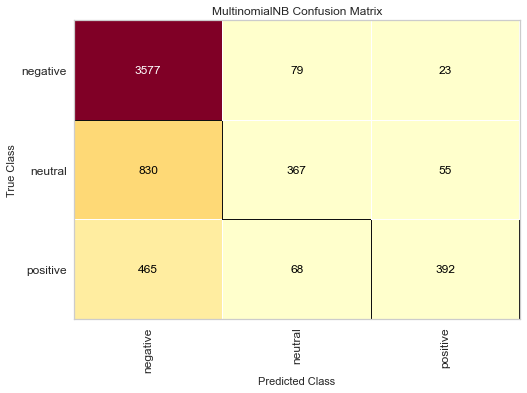

/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


The Support Vector with C=1 Confusion Matrix


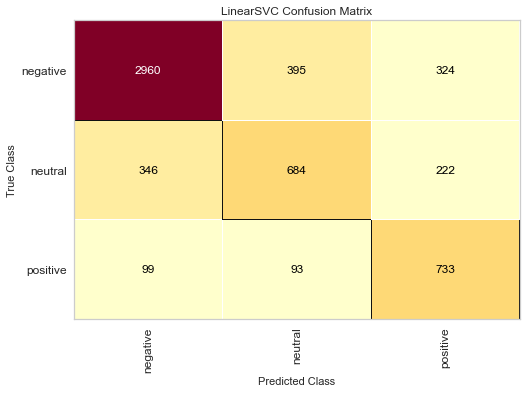

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [89]:
# Yellowbrick confusion matrix

# Naive Bayes
classes = ('negative', 'neutral', 'positive')
nb_cm = ConfusionMatrix(nb_clf, classes=classes)

nb_cm.fit(X_train_vec, y_train)
nb_cm.score(X_test_vec, y_test)
nb_cm.show()

# Bernoulli
nbB_cm = ConfusionMatrix(b_clf, classes=classes)
nbB_cm.fit(X_train_vecB, y_train)
nbB_cm.score(X_test_vecB, y_test)
nbB_cm.show()

# TFIDF
nbt_cm = ConfusionMatrix(nb_clf, classes=classes)
nbt_cm.fit(X_train_vect, y_train)
nbt_cm.score(X_test_vect, y_test)
nbt_cm.show()

print('The Support Vector with C=1 Confusion Matrix')
# SVM
svm_cm = ConfusionMatrix(svm_clf, classes=classes)
svm_cm.fit(X_train_vec, y_train)
svm_cm.score(X_test_vec, y_test)
svm_cm.show()

The Support Vector with C=1 TFIDF Confusion Matrix


/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


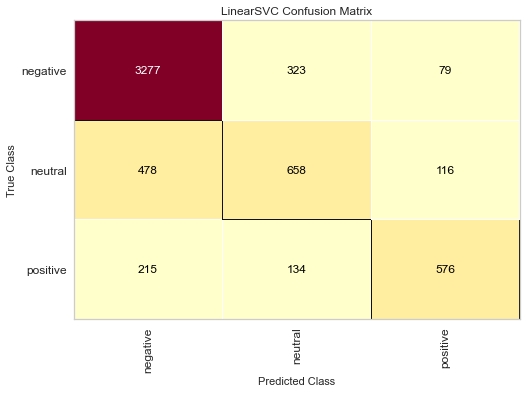

/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


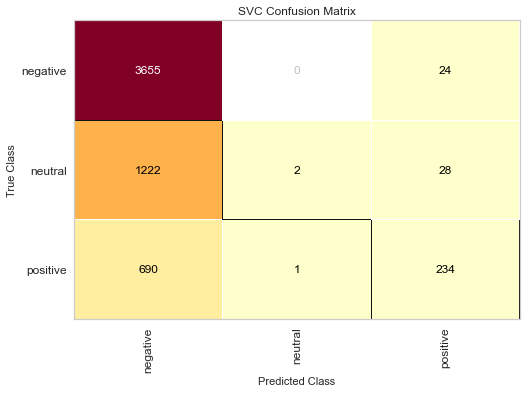

/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


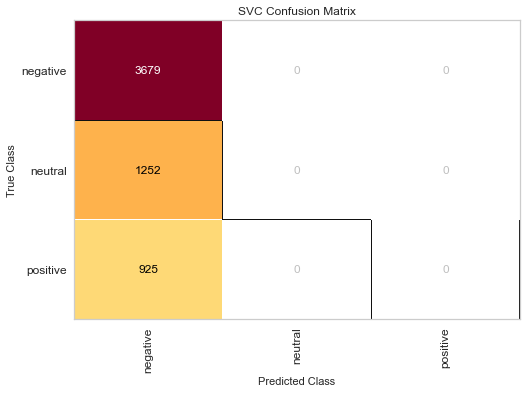

/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


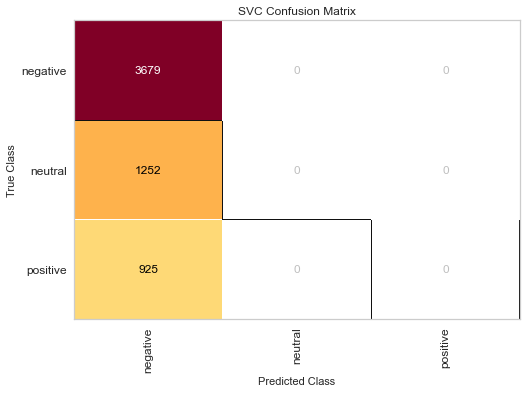

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [90]:
# SVM with TFIDF data

print('The Support Vector with C=1 TFIDF Confusion Matrix')
svmt_cm = ConfusionMatrix(svm_clf, classes=classes)
svmt_cm.fit(X_train_vect, y_train)
svmt_cm.score(X_test_vect, y_test)
svmt_cm.show()

# SVM with C = 10 RBF
svmR_cm = ConfusionMatrix(svm_clfR10, classes=classes)
svmR_cm.fit(X_train_vec, y_train)
svmR_cm.score(X_test_vec, y_test)
svmR_cm.show()

# SVM with RBF
svmR_cm = ConfusionMatrix(svm_clfR1, classes=classes)
svmR_cm.fit(X_train_vec, y_train)
svmR_cm.score(X_test_vec, y_test)
svmR_cm.show()

# SVM with Poly Kernal
svmP_cm = ConfusionMatrix(svm_clfP1, classes=classes)
svmP_cm.fit(X_train_vec, y_train)
svmP_cm.score(X_test_vec, y_test)
svmP_cm.show()

/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


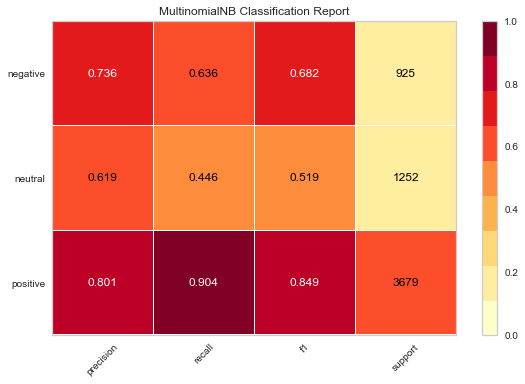

Bernoulli Naive Bayes Classification Report


/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


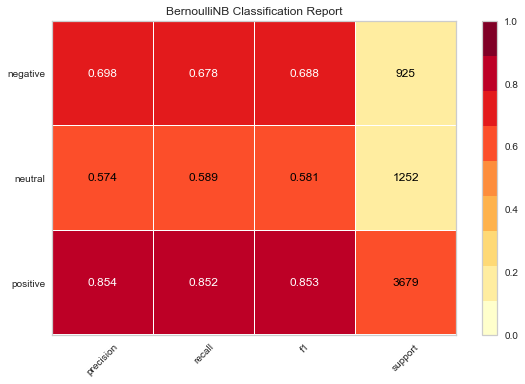

/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


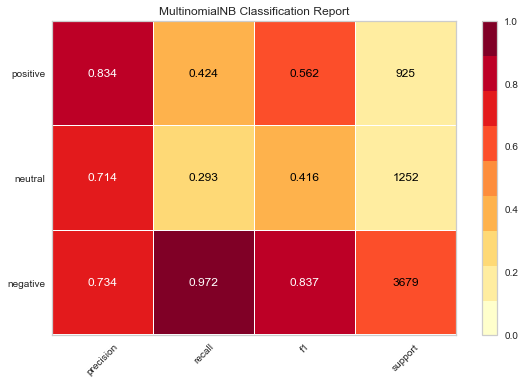

In [91]:
# Yellowbrick Classification Report
classes = ('positive', 'neutral', 'negative')
# Naive Bayes
visualizer = classification_report(nb_clf, X_train_vec, y_train, X_test_vec, y_test, classes=classes, support=True)
# Bernoulli
print('Bernoulli Naive Bayes Classification Report')
visualizer = classification_report(b_clf, X_train_vecB, y_train, X_test_vecB, y_test, classes=classes, support=True)
# TFIDF
visualizer = classification_report(nb_clf, X_train_vect, y_train, X_test_vect, y_test, classess=classes, support=True)